In [4]:
#El ejercicio final pero solo con una muestra de 10000 filas para qu no tarde un tiempo excesivo en ejecutar todo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.tree import DecisionTreeRegressor


In [5]:
import pandas as pd

# Cargar las primeras 10000 líneas del archivo

df = pd.read_csv("Datos/covtype.data", nrows=500000)
df.to_csv("Datos/covtypeI.data", index=False)

In [6]:
datos = pd.read_csv("Datos/covtypeI.data")

In [7]:
columnas_Wilderness_Area = ["Wilderness_Area" + str(i) for i in range(1, 5)]
columnas_Soil_Type = ["Soil_Type" + str(i) for i in range(1, 41)]
columnas_restantes = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
"Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon",
"Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]
columna_ultima = ["Cover_Type"]
columnas_final = columnas_restantes + columnas_Wilderness_Area + columnas_Soil_Type + columna_ultima

In [8]:
datos.columns = columnas_final

In [10]:
#EJERCICIO 1
X = datos.drop('Cover_Type', axis=1)
y = datos['Cover_Type']

In [11]:
#Crear un modelo de árbol de decisión y ajustarlo a los datos:
tree_model = DecisionTreeRegressor(random_state=100)
tree_model.fit(X, y)

DecisionTreeRegressor(random_state=100)

In [12]:
#Obtener las importancias de las variables:
importances = pd.Series(tree_model.feature_importances_, index=X.columns)

In [13]:
#Ordenar las importancias de las variables de mayor a menor:
sorted_importances = importances.sort_values(ascending=False)

In [14]:
#Calcular la suma acumulada de las importancias y el porcentaje que representa cada variable:
cumulative_importances = sorted_importances.cumsum()
cumulative_importances_percent = 100*cumulative_importances/cumulative_importances[-1]

In [15]:
#Seleccionar las variables que aglutinan hasta el 95% de la información requerida:
selected_variables = cumulative_importances_percent[cumulative_importances_percent <= 95].index
selected_variables = selected_variables.append(pd.Index(["Cover_Type"]))

print(selected_variables)

Index(['Elevation', 'Horizontal_Distance_To_Fire_Points',
       'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Wilderness_Area3',
       'Wilderness_Area1', 'Soil_Type32', 'Aspect', 'Hillshade_Noon',
       'Hillshade_9am', 'Hillshade_3pm', 'Soil_Type39', 'Slope', 'Soil_Type33',
       'Soil_Type38', 'Cover_Type'],
      dtype='object')


In [16]:
datos_1 = datos[selected_variables]
print(datos_1)

        Elevation  Horizontal_Distance_To_Fire_Points  \
0            2590                                6225   
1            2804                                6121   
2            2785                                6211   
3            2595                                6172   
4            2579                                6031   
...           ...                                 ...   
499995       3235                                1366   
499996       3234                                1376   
499997       3233                                1387   
499998       3235                                1398   
499999       3237                                1410   

        Horizontal_Distance_To_Roadways  Horizontal_Distance_To_Hydrology  \
0                                   390                               212   
1                                  3180                               268   
2                                  3090                               242   
3      

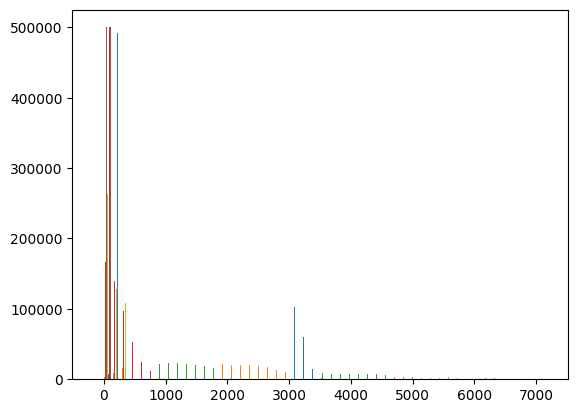

In [17]:
#EJERCICIO2

# Generar histograma de todas las variables
plt.hist(datos_1.values, bins=50)
plt.show()


In [18]:
# Obtener las columnas que se van a normalizar
cols_to_normalize = datos_1.columns[:-1]

# Normalizar los valores de las columnas
datos_1[cols_to_normalize] = (datos_1[cols_to_normalize] - datos_1[cols_to_normalize].min()) / (datos_1[cols_to_normalize].max() - datos_1[cols_to_normalize].min())

# Restar 1 del valor de la columna 'Cover_Type'
datos_1['Cover_Type'] -= 1


C:\Users\smite\AppData\Local\Temp\ipykernel_11792\3532958195.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_1[cols_to_normalize] = (datos_1[cols_to_normalize] - datos_1[cols_to_normalize].min()) / (datos_1[cols_to_normalize].max() - datos_1[cols_to_normalize].min())
C:\Users\smite\AppData\Local\Temp\ipykernel_11792\3532958195.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_1['Cover_Type'] -= 1


In [19]:
datos_norm = datos_1.copy()

In [20]:
#EJERCICIO3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(datos_norm.iloc[:, :-1], datos_norm.iloc[:, -1], test_size=0.2, random_state=100)

# entrenar modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=100)
model.fit(X_train, y_train)

In [ ]:
# predecir en datos de test y calcular métricas de evaluación
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
report = classification_report(y_test, y_pred, zero_division=0)
matrix = confusion_matrix(y_test, y_pred)

# imprimir resultados
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Classification report:\n", report)
print("Confusion matrix:\n", matrix)

Accuracy: 0.72649
F1-score: 0.7126720542877559
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.70     35290
           1       0.75      0.83      0.79     50228
           2       0.63      0.81      0.71      5613
           3       0.71      0.24      0.36       593
           4       0.00      0.00      0.00      1859
           5       0.41      0.16      0.23      2975
           6       0.77      0.55      0.65      3442

    accuracy                           0.73    100000
   macro avg       0.57      0.47      0.49    100000
weighted avg       0.71      0.73      0.71    100000

Confusion matrix:
 [[24120 10603     2     0     0     7   558]
 [ 8155 41459   444     0    20   146     4]
 [    0   587  4541    41     3   441     0]
 [    0     2   394   142     0    55     0]
 [    2  1795    31     0     0    31     0]
 [    0   649  1831    18     0   477     0]
 [ 1509    23     0     0     0     0  1910

In [ ]:
# predecir en datos de test y calcular métricas de evaluación
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
report = classification_report(y_test, y_pred, zero_division=0)
matrix = confusion_matrix(y_test, y_pred)

# imprimir resultados
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Classification report:\n", report)
print("Confusion matrix:\n", matrix)

Accuracy: 0.72649
F1-score: 0.7126720542877559
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.70     35290
           1       0.75      0.83      0.79     50228
           2       0.63      0.81      0.71      5613
           3       0.71      0.24      0.36       593
           4       0.00      0.00      0.00      1859
           5       0.41      0.16      0.23      2975
           6       0.77      0.55      0.65      3442

    accuracy                           0.73    100000
   macro avg       0.57      0.47      0.49    100000
weighted avg       0.71      0.73      0.71    100000

Confusion matrix:
 [[24120 10603     2     0     0     7   558]
 [ 8155 41459   444     0    20   146     4]
 [    0   587  4541    41     3   441     0]
 [    0     2   394   142     0    55     0]
 [    2  1795    31     0     0    31     0]
 [    0   649  1831    18     0   477     0]
 [ 1509    23     0     0     0     0  1910

In [ ]:
#EJERCICIO 4
from dask_ml.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Crear modelo Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=100)

# Definir rango de profundidades
depths = range(2, 31)

# Definir parámetros de GridSearchCV
param_grid = {'max_depth': depths}

# Realizar GridSearchCV con Dask
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener los resultados de GridSearchCV
results = grid_search.cv_results_

# Obtener los valores de los parámetros y el score
params = results['params']
scores = results['mean_test_score']

# Crear gráfica de curva de complejidad
plt.plot(depths, scores, '-o')
plt.xlabel('Profundidad')
plt.ylabel('Accuracy')
plt.title

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(.1, 1.0, 10)):
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title("Curva de Aprendizaje")
    plt.xlabel("Número de Muestras")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    plt.show()
    
# Generamos la curva de aprendizaje para el modelo Decision Tree Classifier con profundidad óptima
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=100)
dtc = DecisionTreeClassifier(max_depth=12, random_state=100)
plot_learning_curve(dtc, X, y, cv)

In [ ]:
#EJERCICIO5
import dask
from dask import delayed
from dask.distributed import Client

# Creamos el cliente Dask
client = Client()

# Entrenamiento del modelo
@delayed
def train_rfc(X_train, y_train, random_state, oob_score):
    rfc = RandomForestClassifier(random_state=random_state, oob_score=oob_score)
    rfc.fit(X_train, y_train)
    return rfc

rfc = train_rfc(X_train, y_train, random_state=100, oob_score=True)

# Evaluación del modelo
@delayed
def eval_rfc(rfc, X_test, y_test):
    y_pred = rfc.predict(X_test)

    rfc_accuracy = accuracy_score(y_test, y_pred)
    rfc_f1 = f1_score(y_test, y_pred, average='weighted')
    rfc_report = classification_report(y_test, y_pred, zero_division=0)
    rfc_cm = confusion_matrix(y_test, y_pred)
    rfc_oob = rfc.oobscore
    tree_depths = [estimator.tree.maxdepth for estimator in rfc.estimators_]
    median_tree_depth = np.median(tree_depths)
    
    return rfc_accuracy, rfc_f1, rfc_report, rfc_cm, rfc_oob, median_tree_depth

results = eval_rfc(rfc, X_test, y_test)

# Definición de los rangos para cada hiperparámetro
n_estimators_range = [200, 300, 400]
max_depth_range = [20, 30, None]
max_features_range = ["auto", "log2", None]

# Definición de los parámetros a evaluar en GridSearchCV
params_grid = {
    "n_estimators": n_estimators_range,
    "max_depth": max_depth_range,
    "max_features": max_features_range
}

# Entrenamiento del modelo óptimo
@delayed
def train_rfc_opt(X_train, y_train, params_grid, random_state):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    rfc_opt = GridSearchCV(RandomForestClassifier(oob_score=True, random_state=random_state), params_grid, scoring='accuracy', cv=cv, n_jobs=-1)

    rfc_opt.fit(X_train, y_train)
    return rfc_opt

rfc_opt = train_rfc_opt(X_train, y_train, params_grid, random_state=100)

# Evaluación del modelo óptimo
@delayed
def eval_rfc_opt(rfc_opt, X_test, y_test):
    y_pred = rfc_opt.predict(X_test)

    rfc_opt_accuracy = accuracy_score(y_test, y_pred)
    rfc_opt_f1 = f1_score(y_test, y_pred, average='weighted')
    rfc_opt_report = classification_report(y_test, y_pred, zero_division=0)
    rfc_opt_cm = confusion_matrix(y_test, y_pred)
    rfc_opt_oob = rfc_opt.best_estimator_.oob_score_
    
    return rfc_opt_accuracy, rfc_opt_f1, rfc_opt

In [ ]:
from sklearn.model_selection import learning_curve

# Definición de la función para obtener la gráfica del Learning Curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
title = "Learning Curves (Random Forest)"
plot_learning_curve(RandomForestClassifier(n_estimators=350, max_depth=22, max_features='auto', random_state=100), title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()

In [ ]:
# Importar las librerías necesarias
#import xgboost as xgb
#from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


# Crear el modelo
#xgb_clf = xgb.XGBClassifier(random_state=100)

# Entrenar el modelo
#xgb_clf.fit(X_train, y_train)

# Realizar las predicciones
#y_pred = xgb_clf.predict(X_test)

# Calcular las métricas de evaluación
#xgb_accuracy = accuracy_score(y_test, y_pred)
#xgb_f1 = f1_score(y_test, y_pred, average='weighted')
#xgb_report = classification_report(y_test, y_pred, zero_division=0)
#xgb_cm = confusion_matrix(y_test, y_pred)


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Rangos de los hiperparámetros
# n_estimators_range = np.arange(100, 501, 100)
# max_depth_range = np.arange(6, 21, 2)
# learning_rate_range = [0.01, 0.1, 0.3, 0.5]

# # Definición de los parámetros a evaluar en GridSearchCV
# params_grid = {
#     "n_estimators": n_estimators_range,
#     "max_depth": max_depth_range,
#     "learning_rate": learning_rate_range
# }

# # Creación del modelo con GridSearchCV y evaluación
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
# xgb_opt = GridSearchCV(xgb.XGBClassifier(random_state=100), params_grid, scoring='accuracy', cv=cv, n_jobs=-1)
# xgb_opt.fit(X_train, y_train)

# # Evaluación del modelo óptimo
# y_pred = xgb_opt.predict(X_test)

# xgb_opt_accuracy = accuracy_score(y_test, y_pred)
# xgb_opt_f1 = f1_score(y_test, y_pred, average='weighted')
# xgb_opt_report = classification_report(y_test, y_pred, zero_division=0)
# xgb_opt_cm = confusion_matrix(y_test, y_pred)

In [ ]:
import dask.dataframe as dd
from dask_ml.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Paso 5: Entrenar modelos Bayesianos con scikit-learn y calcular métricas
# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb, average='weighted')
classification_gnb = classification_report(y_test, y_pred_gnb, zero_division=0)

# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
f1_mnb = f1_score(y_test, y_pred_mnb, average='weighted')
classification_mnb = classification_report(y_test, y_pred_mnb, zero_division=0)

# ComplementNB
cnb = ComplementNB()
cnb.fit(X_train, y_train)
y_pred_cnb = cnb.predict(X_test)
accuracy_cnb = accuracy_score(y_test, y_pred_cnb)
f1_cnb = f1_score(y_test, y_pred_cnb, average='weighted')
classification_cnb = classification_report(y_test, y_pred_cnb, zero_division=0)

# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
f1_bnb = f1_score(y_test, y_pred_bnb, average='weighted')
classification_bnb = classification_report(y_test, y_pred_bnb, zero_division=0)

# Paso 7: Gráfica de Learning Curve para GaussianNB
train_sizes, train_scores, test_scores = learning_curve(GaussianNB(), X_train, y_train, random_state=100, cv=5, train_sizes=[1000, 2000, 3000, 4000, 5000])

# Calcular las medias y desviaciones estándar de los puntajes de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure()
plt.title("Curva de Aprendizaje - GaussianNB")
plt.xlabel("Número de muestras de entrenamiento")
plt.ylabel("Precisión")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Prueba")

plt.legend(loc="best")
plt.show()



In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

models = [GaussianNB(), MultinomialNB(), ComplementNB(), BernoulliNB()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred, zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(type(model).__name__)
    print("Accuracy: {:.4f}".format(acc))
    print("F1-score: {:.4f}".format(f1))
    print("Classification Report:\n", class_report)
    print("Confusion Matrix:\n", conf_matrix)

In [3]:
#EJERCICIO 8
import dask.array as da
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import learning_curve

def train_knn_model(n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, n_jobs=-1)
    knn.fit(X_train_dask, y_train_dask)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    clf_report = classification_report(y_test, y_pred, zero_division=0)
    return acc, f1, clf_report

# Convertir datos a dask.array
X_train_dask = da.from_array(X_train.values, chunks=X_train.values.shape)
y_train_dask = da.from_array(y_train.values, chunks=y_train.values.shape)

# K-Nearest Neighbors con configuración por defecto
acc_default, f1_default, clf_report_default = train_knn_model(5)

# K-Nearest Neighbors con 1 vecino
acc_1, f1_1, clf_report_1 = train_knn_model(1)

# K-Nearest Neighbors con 100 vecinos
acc_100, f1_100, clf_report_100 = train_knn_model(100)

# Imprimir métricas
print("K-Nearest Neighbors con configuración por defecto:")
print(f"Accuracy: {acc_default}")
print(f"F1-score (weighted): {f1_default}")
print("Classification report:")
print(clf_report_default)
print("----------------------------------------------------")
print("K-Nearest Neighbors con 1 vecino:")
print(f"Accuracy: {acc_1}")
print(f"F1-score (weighted): {f1_1}")
print("Classification report:")
print(clf_report_1)
print("----------------------------------------------------")
print("K-Nearest Neighbors con 100 vecinos:")
print(f"Accuracy: {acc_100}")
print(f"F1-score (weighted): {f1_100}")
print("Classification report:")
print(clf_report_100)

plot_learning_curve_knn(KNeighborsClassifier(n_neighbors=5), X_train_dask, y_train_dask, 5, cv=5)
plot_learning_curve_knn(KNeighborsClassifier(n_neighbors=1), X_train_dask, y_train_dask, 1, cv=5)
plot_learning_curve_knn(KNeighborsClassifier(n_neighbors=100), X_train_dask, y_train_dask, 100, cv=5)



NameError: name 'X_train' is not defined

In [ ]:
#EJERCICIO 9
import dask_ml.model_selection as dcv
from dask.distributed import Client
from sklearn.neural_network import MLPClassifier


# Crear cliente Dask para el cálculo distribuido
client = Client()

# MLPClassifier con configuración por defecto
model_mlp1 = MLPClassifier(random_state=100)

# Entrenamiento y evaluación paralelizados utilizando Dask
with client:
    model_mlp1 = dcv.GridSearchCV(model_mlp1, param_grid={}, cv=5, scoring='f1_weighted')
    model_mlp1.fit(X_train, y_train)

# Evaluar modelo
y_pred = model_mlp1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
clf_report = classification_report(y_test, y_pred, zero_division=0)

print("MLPClassifier con configuración por defecto:")
print(f"Accuracy: {acc}")
print(f"F1-score (weighted): {f1}")
print("Classification report:")
print(clf_report)

# MLPClassifier con hiperparámetros definidos
model_mlp2 = MLPClassifier(random_state=100, hidden_layer_sizes=(100, 200, 100), max_iter=10000, alpha=1e-5, tol=1e-5)

# Entrenamiento y evaluación paralelizados utilizando Dask
with client:
    model_mlp2 = dcv.GridSearchCV(model_mlp2, param_grid={}, cv=5, scoring='f1_weighted')
    model_mlp2.fit(X_train, y_train)

# Evaluar modelo
y_pred = model_mlp2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
clf_report = classification_report(y_test, y_pred, zero_division=0)

print("\nMLPClassifier con hiperparámetros definidos:")
print(f"Accuracy: {acc}")
print(f"F1-score (weighted): {f1}")
print("Classification report:")
print(clf_report)



C:\Users\smite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 64374 instead
  warnings.warn(
